In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ex3_train.csv", index_col=0) 
df_test = pd.read_csv("ex3_test.csv", index_col=0) 
df.head(5)
df_test.head(5)

,1,2,3,4,5,6,7,8,9,10,...,391,392,393,394,395,396,397,398,399,y
0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9
0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6
0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5
0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7
0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [3]:
def one_hot_encoding(y):
    if(y.shape[1]!=1):
        print('input is wrong');
        return -1
    length = y.shape[0]
    output = np.zeros((10,length))   
    
    for i in range(length):         
        if(y[i][0]>9):
            #to prevent index out of bound
            print('label is wrong');
            return -1
        else:
            output[y[i][0]][i]=1   
    return output

In [6]:
#split data
size = df.shape[0]
x = df.iloc[:,0:400]
X = x.values
y = df.iloc[:,-1]
y_digit = y.values.reshape(size,1)
y_one_hot = one_hot_encoding(y_digit)
print ("training dat shape", X.shape, y_digit.shape, y_one_hot.shape)
print('last five numbers:')
print(y_one_hot[:, 3495:])

size_test = df_test.shape[0]
x_test = df_test.iloc[:,0:400]
X_test = x_test.values
y_test = df_test.iloc[:,-1].values.reshape(size_test,1)
print ("test data shape", X_test.shape, y_test.shape)


training dat shape (3500, 400) (3500, 1) (10, 3500)
last five numbers:
[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]]
test data shape (1500, 400) (1500, 1)


In [7]:
def activation_sigmoid(z): 
   
    #print(z.shape)
    a =  1.0/(1.0 + np.exp(-z))
    #print(a.shape)
    #reshape a here?
    
    return a


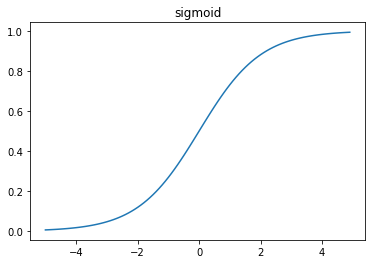

In [8]:
#test and plots for sigmoid functions
z1 = np.arange(-5,5,0.1)
a1 = activation_sigmoid(z1)
plt.plot(z1, a1)
plt.title('sigmoid')
plt.show()

In [9]:
def soft_max(f):
    shift = f - np.max(f) #shift all number to the left so that the sum will not get too big or explode
    exp_f = np.exp(f) 
    return exp_f / np.sum(exp_f) 

In [10]:
def forward_one_layer (weights, X, bias): 
    z = np.dot(weights, X) + bias #bias is a one-column vector   
    a = activation_sigmoid(z) 
    return z,a 

In [11]:
def forward_all_layers(X_data,weights_1, bias_1, weights_2,bias_2): 
    #hidden layer
    z1,a1 = forward_one_layer(weights_1,X_data,bias_1)
    
    #output layer
    z2,a2 = forward_one_layer(weights_2,a1,bias_2)        
        
    return z1,a1,z2,a2

In [12]:
def getGradient(a1, z2, a2, previous_dldz, w):
    dzda = w 
    dadz = getActivationFunctionDerivative(a2)
    dzdw = np.transpose(a1) #do i need transpose?
    
    #dzdw.shape (3500L, 30L)
    #dzdb = 1    
   
    m = 3500    # n of samples
    
    #print('1')
    #print( previous_dldz.shape,dzda.shape,dadz.shape)
    # ((10L, 3500L), (10L, 20L), (20L, 3500L))
    dldz = np.dot(previous_dldz.T,dzda).T * dadz
 
    #print('2')
    #print(dldz.shape,dzdw.shape)
    
    dldw = np.dot( dldz, dzdw )/m    
    dldb = np.sum(dldz, axis = 1, keepdims = True)/(m) #  because dldb is dldz times dzdb which is 1 
    #print('3')
    #print(dldz.shape,dldw.shape,dldb.shape)
    
    return dldz, dldw, dldb 
    
def getActivationFunctionDerivative(a):
    
    dadz = a * (1 - a)
   
    return dadz
        

In [21]:
##test getActivationFunctionDerivative

a = np.array([[-1,1,2],[1,2,-3]])
print( a)

dadz = getActivationFunctionDerivative(a)
print(dadz)


[[-1  1  2]
 [ 1  2 -3]]
[[ -2   0  -2]
 [  0  -2 -12]]


In [31]:
def lastLayerGradient(a, X, i=0, j=y_one_hot.shape[1]):  #i j can be used for mini batch, X is the input to last layer
    if(a.shape==y_one_hot[:,i:j].shape):
        dldz = a - y_one_hot[:,i:j]
        m = j-i
        dldw = np.dot(dldz,np.transpose(X))/(m) # m or -m?
        dldb = np.sum(dldz, axis = 1, keepdims = True)/(m)
        #print(dldw.shape, dldb.shape)
        #print('last layer done')
        return dldz, dldw, dldb
    else:
        print('I did something wrong, shape of a is ', a.shape, ' it should be ', y_one_hot[:,i:j].shape)
        return -1
    
def calculate_cross_entropy_loss(a, i=0, j=y_one_hot.shape[1]):
    if(a.shape==y_one_hot[:,i:j].shape):        
        if(a.any()==0):
            a[a==0] = 0.00000001
            #print ('shift to right')
        if(a.any()==1):
            a[a==1] = 0.99999999
            #print ('shift to left')        
            
        temp1 = y_one_hot[:,i:j] * np.log(a)
        temp2 = (1 - y_one_hot[:,i:j]) * np.log(1 - a)
       
        loss = (-1 / (j-i)) * np.sum(temp1 + temp2) #j must > i         
    else:
        print('I did something wrong again, shape of a is ', a.shape, ' it should be ', y_one_hot[:,i:j].shape)
        loss = -1
    return loss

def accuracy(prediction,label):
    if (prediction.shape!=label.shape):
        print (prediction.shape)
        print (label.shape)
        print ('wrong input size')
        return -1
    count = 0
    total = prediction.shape[0]
    #print 'size ',total
    for i in range(total):        
        if prediction[i]!= label[i]:
            count+=1
            #print 'i', i
    print ('error count:', count)
    result = 0.0
    error_rate = float(count)/total
    accuracy = 1-error_rate
    return accuracy

In [32]:
def initialization(neurons):
    
    c= [1.0, 1.0]
    for i in range(len(neurons)):    
        
        c[i] = math.sqrt(2)
        
#         c[i] = 4 * math.sqrt(2)
#         c[i] = 2    
    print ('sigma,', c)   
    np.random.seed(0)
    weights_1 = np.random.normal(0, c[0] / math.sqrt(neurons[0] + 400) ,(neurons[0],400))
    weights_2 = np.random.normal(0, c[1] / math.sqrt(neurons[1] + neurons[0]), (neurons[1],neurons[0]))
    print ("shape of weights: ", weights_1.shape, weights_2.shape )


#     bias_1 = np.random.normal(0, c[0] / math.sqrt(neurons[0]), (neurons[0],1))  
#     bias_2 = np.random.normal(0, c[1] / math.sqrt(neurons[1]), (neurons[1],1))
    
    bias_1 = np.zeros((neurons[0],1))  
    bias_2 = np.zeros((neurons[1],1))
    
    print ("shape of bias: ", bias_1.shape, bias_2.shape  )   

    return weights_1, bias_1, weights_2,bias_2

In [33]:
#initialization  #no need to run all the time, can skip and continue training
neurons = [25,10]
weights_1, bias_1, weights_2,bias_2 = initialization(neurons)

sigma, [1.4142135623730951, 1.4142135623730951]
shape of weights:  (25, 400) (10, 25)
shape of bias:  (25, 1) (10, 1)


In [34]:
#main function
max_iterations = 10000
learning_rates = [0.1, 0.2, 0.5]
best_test_accuracy = 0.0
plot_x = np.arange(0,max_iterations,100)
plot_y = np.zeros((len(learning_rates),100))

for j in range(len(learning_rates)):
    weights_1, bias_1, weights_2,bias_2 = initialization(neurons)
    previous_loss = 99999999
    previous_accuracy = 0.0
    for i in range(max_iterations):    

        # X is training data
        z1,a1,z2,a2 = forward_all_layers(np.transpose(X),weights_1, bias_1, weights_2,bias_2)

        if(i%100==0):
           
            loss = calculate_cross_entropy_loss(a2)
           
            te = int(i/100)
            plot_y[j][te] = loss
            print ('iteration: ', i, "loss: ", loss)
            
            if(loss - previous_loss > 10000 or abs(previous_loss - loss) < 0.00000001 or   math.isnan(loss)):
                print('loss is getting worse')
                break    
            previous_loss = loss 

        #back propagation
        dldz_2, dldw_2, dldb_2 = lastLayerGradient(a2,a1)   
        dldz_1, dldw_1, dldb_1 = getGradient(X.T, z1, a1, dldz_2, weights_2)

        #update weights    
        weights_1 -= learning_rates[j]*dldw_1
        weights_2 -= learning_rates[j]*dldw_2

        #update bias 
        bias_1 -= learning_rates[j]*dldb_1
        bias_2 -= learning_rates[j]*dldb_2

        if(i > 0 and i % 100 == 0  ):        
            _,_,_,a3_test = forward_all_layers(np.transpose(X_test),weights_1, bias_1, weights_2,bias_2)
            predict_test = np.argmax(a3_test, axis=0)
            test_length = len(predict_test)
            test_acc = accuracy(predict_test.reshape(test_length,1),y_test)
            if (test_acc > best_test_accuracy):
                best_test_accuracy = test_acc
                print ('New best accuracy: ', test_acc, 'at i=', i, 'with neurons', neurons, 'at learning rate', learning_rates[j])
                best1, best2, best3, best4 = weights_1, bias_1, weights_2,bias_2
                #early stopping
#             if (test_acc < previous_accuracy - 0.01 and test_acc > 0.92  or test_acc < best_test_accuracy - 0.01):
#                 print('Break. Test data accuracy starts to decrease, ', test_acc, 'at iteration', i)
#                 break
            previous_accuracy = test_acc

print ("Total number of iterations ", i+1)
print ('My optimized test data accuracy', best_test_accuracy)



sigma, [1.4142135623730951, 1.4142135623730951]
shape of weights:  (25, 400) (10, 25)
shape of bias:  (25, 1) (10, 1)
iteration:  0 loss:  7.86892515793
iteration:  100 loss:  2.63911900987
error count: 389
New best accuracy:  0.7406666666666666 at i= 100 with neurons [25, 10] at learning rate 0.1
iteration:  200 loss:  2.1337545736
error count: 207
New best accuracy:  0.862 at i= 200 with neurons [25, 10] at learning rate 0.1
iteration:  300 loss:  1.74225766086
error count: 171
New best accuracy:  0.886 at i= 300 with neurons [25, 10] at learning rate 0.1
iteration:  400 loss:  1.45351804911
error count: 160
New best accuracy:  0.8933333333333333 at i= 400 with neurons [25, 10] at learning rate 0.1
iteration:  500 loss:  1.24753127525
error count: 146
New best accuracy:  0.9026666666666667 at i= 500 with neurons [25, 10] at learning rate 0.1
iteration:  600 loss:  1.09591008244
error count: 134
New best accuracy:  0.9106666666666666 at i= 600 with neurons [25, 10] at learning rate 0.

iteration:  8700 loss:  0.143096517949
error count: 60
iteration:  8800 loss:  0.141563728212
error count: 60
iteration:  8900 loss:  0.140057456868
error count: 60
iteration:  9000 loss:  0.138576987095
error count: 60
iteration:  9100 loss:  0.137121639621
error count: 59
New best accuracy:  0.9606666666666667 at i= 9100 with neurons [25, 10] at learning rate 0.1
iteration:  9200 loss:  0.135690771115
error count: 59
iteration:  9300 loss:  0.134283772308
error count: 59
iteration:  9400 loss:  0.132900065836
error count: 59
iteration:  9500 loss:  0.131539103816
error count: 59
iteration:  9600 loss:  0.130200365209
error count: 59
iteration:  9700 loss:  0.128883353031
error count: 59
iteration:  9800 loss:  0.127587591542
error count: 59
iteration:  9900 loss:  0.126312623495
error count: 59
sigma, [1.4142135623730951, 1.4142135623730951]
shape of weights:  (25, 400) (10, 25)
shape of bias:  (25, 1) (10, 1)
iteration:  0 loss:  7.86892515793
iteration:  100 loss:  2.13536699665
er

KeyboardInterrupt: 

In [ ]:
# multiple line plot
plt.plot( plot_x, plot_y[0], marker='', color='skyblue', linewidth=2, label="learning rate = 0.1")
plt.plot( plot_x, plot_y[1], marker='', color='olive', linewidth=2, label="learning rate = 0.2")
plt.plot( plot_x, plot_y[2], marker='', color='red', linewidth=2, label="learning rate = 0.5")
plt.legend()
plt.title('cost vs number of iterations')
plt.ylim(0,5000)
plt.show()

In [ ]:
_,_,_,a3 = forward_all_layers(np.transpose(X),best1, best2,best3,best4)
predict_train_final = np.argmax(soft_max(a3), axis=0)
L = len(predict_train_final)

print 'final train data accuracy. ',accuracy(predict_train_final.reshape(L,1),y_digit)


In [ ]:
_,_,_,a3_final = forward_all_layers(np.transpose(X_test),best1, best2,best3,best4)
predict_final = np.argmax(soft_max(a3_final), axis=0)
L = len(predict_final)
print 'final test data accuracy. ', accuracy(predict_final.reshape(L,1),y_test)